# HW08: Solving Ordinary Differential Equations (ODEs)

Ordinary Differential Equations are equation that deal with changes with respect to one variable. For example, the equation for the velocity of a falling object is a differential equation because it describes how the velocity changes with respect to time. In this homework, we will practice solving differential equations using the Euler method and Scipy's ODEINT.

A simple version of an ODE is:
$$
\frac{dy}{dt} = C
$$
where C is a constant. Here, y is changing at a constant rate with respect to time. The analytical solution is simply 
$$
\int dy = \int C dt \\
y = Ct + y0, 
$$
where y0 is the initial value of y = 0.

Some ODE's can be solved analytically, but many cannot. We'll use this simple example to also integrate it numerically and compare the results.

In [31]:
#Numerically solution with Euler's method
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

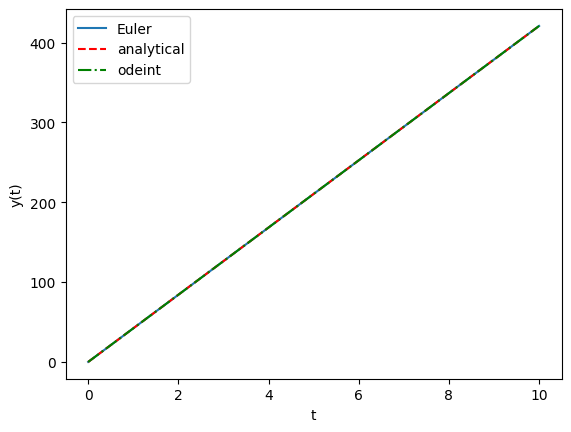

In [44]:
#Specify the constant 
constant = 42.1 # in dy/dt = constant

# Define the equation
def derivative(y,t): #y is the dependent variable, t is the independent variable return is dydt
    return constant # return the right side of dy/dt which in this case is constant

#create some arrays
t = np.linspace(0, 10, 100)
y = np.zeros(len(t))

#initial condition
y[0] = 0

#Now use Euler's method to solve the equation to get y as a function of t
for i in range(1, len(t)):
    y[i] = y[i-1] + derivative(y[i-1],t[i-1])*(t[i] - t[i-1])

#Now use scipy odeint to solve the equation
yode = odeint(derivative, y[0],t)

#now plot the solution
plt.plot(t, y,label='Euler')
plt.plot(t, constant*t, 'r--',label='analytical') #also plot the analytical solution
plt.plot(t, yode, 'g-.',label='odeint') #also plot the solution from odeint
plt.xlabel('t'); plt.ylabel('y(t)')
plt.legend(); plt.show()


The three versions of the solution (analytical, Euler, and ODEINT) are the same (or visually indistinguishable) as seen in the above plot.

-----
## Problem 1
Please solve the below equation using the Euler method. Plot the solution and compare it to the analytical solution.:
$$
\frac{dy}{dt} = -y + C
$$
where C is a constant. Here, y is changing at a constant rate with respect to time. 


**Action 1**: Solve for the analytical solution and specify a function called Analytical1 that takes values of time and returns the value of y given the C value of 3.2 and an initial vallue of 2.3.

In [45]:
# A hint, you can use sympy to solve the equation analytically
import sympy as sp
t = sp.Symbol('t')
y = sp.Function('y')
eq = sp.Eq(y(t).diff(t),-y(t)+3.2)
sp.dsolve(eq, y(t))

Eq(y(t), C1*exp(-t) + 3.2)

**Action 2:** Setup a derivative function as in the example above and fill in arrays with the value of y as a function of time using the Euler method. Use a step size of 0.1 and a total time of 10.0 starting from 0.

**Action 3:** Use the ODEINT function to solve the same equation.

**Action 4:** Plot the analytical solution and the numerical solutions (Euler and ODEINT) on the same plot. Make sure to label the axes and include a legend.

## Problem 2: Radioactive decay. 

$$\frac{dC}{dt} = -\frac{C}{\tau}.$$  
The exact solution is 
$$C(t) = C_0e^{-t/\tau},$$ 
where $C_0$ is the initial concentration.

**Action 1**: Use sympy dsolve to solve the above equation. You should get the same answer as given above.

**Action 2**: Use the Euler method to solve the above equation. Plot the solution and compare it to the analytical solution. Use an initial concentration of 1 and a decay constant of 1. Use a step size of 1 and a total time of 10.0 starting from 0. Thus you'll have 11 points for time for each trace: analytical, euler, and odeint.

**Action 3:** Solve the same with odeint

**Action 4**: Plot the analytical solution and the numerical solutions (Euler and ODEINT) on the same plot. Make sure to label the axes and include a legend.

**Action 5**: Comment on what you observe about the plot. Perhaps you want to change the time step size (1 to 0.1) and see what happens.

`Your answer here`

## Problem 3: Falling Raindrop

A $d_p$ = 1 mm diameter raindrop falls in still air at 300 K, 1 atm. The drop's falling velocity
and position evolve according to the following 2 rate equations:
$$
\frac{dv}{dt} = -g + \frac{18\mu}{\rho_p d_p^2}|v| \\
\frac{dx}{dt} = v
$$

Here, $\mu$ = 1.85 • 10- 5 kg/(m • s) is the viscosity of air, $\rho_p$ is the density of water at 1000 kg/m3, and g =
9.81 m/s^2 . The initial position and velocity of the drop are both 0.
(a) Numerically solve for velocity and position, each of which should be plotted on their own labeled plot for sufficient time to show initial and asymptotal behavior. Use odeint to generate smooth curves.
(b) Find the infinite-time velocity ( called the terminal velocity) of the droplet (approximated at a long time value).

**Hint** : setup your derivative function (`def derivative(vx,t):`) to take in both velocity and position (in a single array or tuple) and return both dvdt and dxdt in an array or tuple. 